# Scikit-learn ile Makine Öğrenmesi

Bu çalışmada bir şirkete ait insan kaynakları bilgileri kullanılacaktır

In [103]:
import pandas as pd
import numpy as np
ik = pd.read_csv('insan_kaynaklari.csv')
ik

,memnuniyet_duzeyi,aldigi_degerlendirme_puani,gerceklestirdigi_proje_sayisi,aylik_ort_calisma_saati,sirkette_calistigi_yil_sayisi,is_kazasina_ugradi,sirketten_ayrildi,son_5_yilda_terfi_aldi,calistigi_bolum,maas_derecesi
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Soru 1: Bir çalışanın memnuniyet düzeyinin tahminlenmesi

In [104]:
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.linear_model import LinearRegression
X= pd.DataFrame(columns =['aldigi_degerlendirme_puani','gerceklestirdigi_proje_sayisi', 'aylik_ort_calisma_saati',
       'sirkette_calistigi_yil_sayisi', 'is_kazasina_ugradi','sirketten_ayrildi', 'son_5_yilda_terfi_aldi', 
       'maas_derecesi'],data=ik)
X = pd.get_dummies(data = X, columns = ['maas_derecesi'] , prefix = ['maas_derecesi'] , drop_first = True)
y = pd.DataFrame(columns=['memnuniyet_duzeyi'], data=ik)
lr_model = LinearRegression()
cv_results = cross_validate(lr_model,X,y,cv=5,scoring =['r2','neg_mean_absolute_error', 'neg_mean_squared_error'])
pd.DataFrame(cv_results)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,0.021517,0.016864,0.209622,-0.194194,-0.057940
1,0.014737,0.015711,-0.036960,-0.176954,-0.047988
2,0.013930,0.015545,-0.000548,-0.175367,-0.047025
3,0.014611,0.014464,0.003528,-0.177385,-0.047900
4,0.014601,0.014488,0.223571,-0.188700,-0.055157


In [105]:
from sklearn.preprocessing import StandardScaler
X= pd.DataFrame(columns =['aldigi_degerlendirme_puani','gerceklestirdigi_proje_sayisi', 'aylik_ort_calisma_saati',
       'sirkette_calistigi_yil_sayisi', 'is_kazasina_ugradi','sirketten_ayrildi', 'son_5_yilda_terfi_aldi',
       'maas_derecesi'],data=ik)
X = pd.get_dummies(data = X, columns = ['maas_derecesi'] , prefix = ['maas_derecesi'] , drop_first = True)
y = pd.DataFrame(columns=['memnuniyet_duzeyi'], data=ik)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1) 
sc = StandardScaler() #standardizasyon
X = sc.fit_transform(X)

In [106]:
lr_model = LinearRegression()
cv_results = cross_validate(lr_model,X,y,cv=6,scoring =['r2','neg_mean_absolute_error', 'neg_mean_squared_error'])
pd.DataFrame(cv_results)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,0.013538,0.009975,0.170629,-0.200939,-0.061589
1,0.008816,0.007735,-0.038776,-0.173550,-0.046503
2,0.013620,0.014537,-0.001606,-0.175607,-0.046952
3,0.007332,0.015479,-0.001346,-0.178044,-0.047908
4,0.012453,0.009192,0.181512,-0.179678,-0.049734
5,0.013661,0.012515,0.233696,-0.184297,-0.052389


In [107]:
X = pd.DataFrame(columns =['aylik_ort_calisma_saati', 'is_kazasina_ugradi','sirketten_ayrildi', 'son_5_yilda_terfi_aldi','maas_derecesi'],data=ik)
X = pd.get_dummies(data = X, columns = ['maas_derecesi'] , prefix = ['maas_derecesi'] , drop_first = True)
X = sc.fit_transform(X)
cv_results = cross_validate(lr_model,X,y,cv=6,n_jobs=-1,scoring =['r2','neg_mean_absolute_error', 'neg_mean_squared_error'])
pd.DataFrame(cv_results)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,0.017007,0.012056,0.099450,-0.203680,-0.066875
1,0.013632,0.014727,-0.000709,-0.168872,-0.044799
2,0.014724,0.012639,0.001052,-0.175780,-0.046827
3,0.014540,0.012052,-0.001705,-0.177987,-0.047925
4,0.013055,0.012999,0.133200,-0.182828,-0.052669
5,0.014633,0.009913,0.176477,-0.187507,-0.056301


In [108]:
X = pd.DataFrame(columns =['aylik_ort_calisma_saati','aldigi_degerlendirme_puani'],data=ik)
cv_results = cross_validate(lr_model,X,y,cv=6,n_jobs=-1,scoring =['r2','neg_mean_absolute_error', 'neg_mean_squared_error'])
X = sc.fit_transform(X)
pd.DataFrame(cv_results)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error
0,0.015765,0.017315,-0.297303,-0.261752,-0.096338
1,0.014349,0.016183,-0.125001,-0.183277,-0.050363
2,0.013345,0.018163,-0.097231,-0.186691,-0.051434
3,0.012992,0.015551,-0.106332,-0.189480,-0.052931
4,0.015317,0.018905,0.011613,-0.201661,-0.060057
5,0.015186,0.011897,-0.018414,-0.218691,-0.069625


In [109]:
List1 = ['aylik_ort_calisma_saati','aldigi_degerlendirme_puani']
List2 = [['0.72','0.88'],['0.45','0.33'],['0.25','0.54']]
tests = pd.DataFrame(columns=List1,data=List2)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1) 
lr_model.fit(X_train,y_train)
lr_model.predict(tests)

array([[0.6306789 ],
       [0.61750751],
       [0.62677832]])

### Soru 2: Bir çalışanın şirketten ayrılıp ayrılmayacağının tahminlenmesi

In [110]:
# yeni özniteliklerin belirlenmesi
X2 = pd.DataFrame(columns = ['maas_derecesi' , 'son_5_yilda_terfi_aldi' , 'memnuniyet_duzeyi' ,'gerceklestirdigi_proje_sayisi'], data= ik)
X2 = pd.get_dummies(data = X2, columns = ['maas_derecesi'] , prefix = ['maas_derecesi'] , drop_first = True)
y2 = pd.DataFrame(columns = ['sirketten_ayrildi'], data=ik)

######  KNN

In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
results = cross_validate(knn, X2,y2,cv=6,n_jobs=-1,scoring =['accuracy','precision_micro','recall_micro','f1_micro'])
results_df = pd.DataFrame(results)
results_df

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
0,0.276237,0.603289,0.914800,0.914800,0.914800,0.914800
1,0.288560,0.531631,0.903200,0.903200,0.903200,0.903200
2,0.287564,0.574224,0.904400,0.904400,0.904400,0.904400
3,0.283403,0.581497,0.914000,0.914000,0.914000,0.914000
4,0.277101,0.545115,0.906800,0.906800,0.906800,0.906800
5,0.288722,0.566886,0.913565,0.913565,0.913565,0.913565


######  DECİSİON TREE

In [112]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy')

In [113]:
results = cross_validate(dt_model, X2,y2,cv=6,n_jobs=-1,scoring =['accuracy','precision_micro','recall_micro','f1_micro'])

In [114]:
pd.DataFrame(results)

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
0,0.064539,0.034391,0.912400,0.912400,0.912400,0.912400
1,0.082829,0.035519,0.903600,0.903600,0.903600,0.903600
2,0.061212,0.035400,0.906400,0.906400,0.906400,0.906400
3,0.067450,0.034385,0.914000,0.914000,0.914000,0.914000
4,0.075219,0.027856,0.920000,0.920000,0.920000,0.920000
5,0.080036,0.021936,0.916767,0.916767,0.916767,0.916767


######  GRİD SEARCH

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size = 0.2,random_state = 1) 
params = {'max_depth':[4,5,6],'min_samples_leaf':[1,2,3], 'min_samples_split':[2,3,4]} 
grid_search = GridSearchCV(dt_model, param_grid=params,cv=6,n_jobs=-1)
grid_search.fit(X2_train,y2_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(criterion='entropy'),
             n_jobs=-1,
             param_grid={'max_depth': [4, 5, 6], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4]})

In [116]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,0.055219,0.002872,0.012474,0.002747,4,1,2,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.9185,0.9215,0.918,0.9105,0.9105,0.92046,0.916577,0.004452,10
1,0.037597,0.010088,0.007038,0.000741,4,1,3,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.9185,0.9215,0.918,0.9105,0.9105,0.92046,0.916577,0.004452,10
2,0.030405,0.002769,0.007448,0.002798,4,1,4,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.9185,0.9215,0.918,0.9105,0.9105,0.92046,0.916577,0.004452,10
3,0.027764,0.004859,0.007345,0.002825,4,2,2,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s...",0.9185,0.9215,0.918,0.9105,0.9105,0.92046,0.916577,0.004452,10
4,0.027374,0.005172,0.007584,0.002699,4,2,3,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s...",0.9185,0.9215,0.918,0.9105,0.9105,0.92046,0.916577,0.004452,10
5,0.030200,0.004692,0.006237,0.001794,4,2,4,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s...",0.9185,0.9215,0.918,0.9105,0.9105,0.92046,0.916577,0.004452,10
6,0.028464,0.007161,0.007869,0.004106,4,3,2,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.9185,0.9215,0.918,0.9105,0.9100,0.92046,0.916493,0.004568,21
7,0.030576,0.010326,0.006437,0.001321,4,3,3,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.9185,0.9215,0.918,0.9105,0.9100,0.92046,0.916493,0.004568,21
8,0.029364,0.012454,0.007237,0.003038,4,3,4,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.9185,0.9215,0.918,0.9105,0.9100,0.92046,0.916493,0.004568,21
9,0.028054,0.003024,0.008732,0.005774,5,1,2,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.9185,0.9215,0.918,0.9105,0.9105,0.92096,0.916660,0.004528,1


In [117]:
y2_pred = grid_search.predict(X2_test)

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y2_test, y2_pred)
pre = precision_score(y2_test, y2_pred, average='micro')
rec = recall_score(y2_test, y2_pred, average='micro')
f1 = f1_score(y2_test, y2_pred, average='micro')
acc, pre, rec, f1

(0.9153333333333333,
 0.9153333333333333,
 0.9153333333333333,
 0.9153333333333333)

######  RANDOM FOREST

In [119]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion='entropy')
results = cross_validate(rf_model, X2,y2,cv=6,n_jobs=-1,scoring =['accuracy','precision_micro','recall_micro','f1_micro'])
pd.DataFrame(results)

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
0,1.831717,0.120770,0.913200,0.913200,0.913200,0.913200
1,1.830489,0.129494,0.904400,0.904400,0.904400,0.904400
2,1.778413,0.113913,0.906000,0.906000,0.906000,0.906000
3,1.818808,0.123702,0.916800,0.916800,0.916800,0.916800
4,1.815803,0.124702,0.920000,0.920000,0.920000,0.920000
5,1.812041,0.122729,0.921168,0.921168,0.921168,0.921168


In [120]:
# farklı öznitelikler ile yeniden çalışma yapılması
X2 = pd.DataFrame(columns = ['maas_derecesi' , 'is_kazasina_ugradi' , 'memnuniyet_duzeyi' ,'aylik_ort_calisma_saati'], data= ik)
X2 = pd.get_dummies(data = X2, columns = ['maas_derecesi'] , prefix = ['maas_derecesi'] , drop_first = True)
y2 = pd.DataFrame(columns = ['sirketten_ayrildi'], data=ik)

###### KNN

In [121]:
knn = KNeighborsClassifier()
results = cross_validate(knn, X2,y2,cv=6,n_jobs=-1,scoring =['accuracy','precision_micro','recall_micro','f1_micro'])
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size = 0.2,random_state = 1) 
results_df = pd.DataFrame(results)
results_df

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
0,0.100442,0.337361,0.902800,0.902800,0.902800,0.902800
1,0.104415,0.335408,0.849200,0.849200,0.849200,0.849200
2,0.101318,0.326784,0.851200,0.851200,0.851200,0.851200
3,0.093478,0.316700,0.884400,0.884400,0.884400,0.884400
4,0.099279,0.318485,0.908400,0.908400,0.908400,0.908400
5,0.093239,0.320241,0.903161,0.903161,0.903161,0.903161


######  Decision Tree

In [122]:
dt_model = DecisionTreeClassifier(criterion='entropy')
results = cross_validate(dt_model, X2,y2,cv=6,n_jobs=-1,scoring =['accuracy','precision_micro','recall_micro','f1_micro'])
pd.DataFrame(results)

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
0,0.068443,0.020867,0.941600,0.941600,0.941600,0.941600
1,0.066180,0.024456,0.911200,0.911200,0.911200,0.911200
2,0.063747,0.020591,0.888000,0.888000,0.888000,0.888000
3,0.072597,0.015666,0.928400,0.928400,0.928400,0.928400
4,0.065285,0.016667,0.964000,0.964000,0.964000,0.964000
5,0.069857,0.015509,0.962785,0.962785,0.962785,0.962785


######  Grid Search

In [123]:
params = {'max_depth':[4,5,6],'min_samples_leaf':[1,2,3], 'min_samples_split':[2,3,4]} 
grid_search = GridSearchCV(dt_model, param_grid=params,cv=6,n_jobs=-1)
grid_search.fit(X2_train,y2_train)
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,0.042820,0.005211,0.008167,0.001089,4,1,2,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.9135,0.9145,0.9120,0.9060,0.902,0.914457,0.910410,0.004750,19
1,0.038814,0.005555,0.007950,0.002604,4,1,3,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.9135,0.9145,0.9120,0.9060,0.902,0.914457,0.910410,0.004750,19
2,0.037565,0.003604,0.008767,0.001889,4,1,4,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.9135,0.9145,0.9120,0.9060,0.902,0.914457,0.910410,0.004750,19
3,0.029531,0.002890,0.006512,0.001674,4,2,2,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s...",0.9135,0.9145,0.9120,0.9060,0.902,0.914457,0.910410,0.004750,19
4,0.035857,0.014787,0.006546,0.001137,4,2,3,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s...",0.9135,0.9145,0.9120,0.9060,0.902,0.914457,0.910410,0.004750,19
5,0.031109,0.003624,0.006299,0.000986,4,2,4,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s...",0.9135,0.9145,0.9120,0.9060,0.902,0.914457,0.910410,0.004750,19
6,0.037296,0.004805,0.006899,0.001662,4,3,2,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.9135,0.9145,0.9120,0.9060,0.902,0.914457,0.910410,0.004750,19
7,0.038618,0.009018,0.006259,0.000425,4,3,3,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.9135,0.9145,0.9120,0.9060,0.902,0.914457,0.910410,0.004750,19
8,0.029718,0.001391,0.006894,0.000579,4,3,4,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.9135,0.9145,0.9120,0.9060,0.902,0.914457,0.910410,0.004750,19
9,0.037183,0.006028,0.006679,0.001422,5,1,2,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.9195,0.9220,0.9160,0.9115,0.909,0.921461,0.916577,0.004921,10


In [124]:
y2_pred = grid_search.predict(X2_test)

acc = accuracy_score(y2_test, y2_pred)
pre = precision_score(y2_test, y2_pred, average='micro')
rec = recall_score(y2_test, y2_pred, average='micro')
f1 = f1_score(y2_test, y2_pred, average='micro')
acc, pre, rec, f1

(0.9113333333333333,
 0.9113333333333333,
 0.9113333333333333,
 0.9113333333333333)

In [125]:
List1_1 = ['maas_derecesi' , 'is_kazasina_ugradi' , 'memnuniyet_duzeyi' ,'aylik_ort_calisma_saati']
List1_2 = [['medium','1','0.56','478'],
           ['low','0','0.7','413'],
           ['high','0','0.89','212']]
tests2 = pd.DataFrame(columns=List1_1,data=List1_2)
tests2 = pd.get_dummies(data = tests2, columns = ['maas_derecesi'] , prefix = ['maas_derecesi'] , drop_first = True)
dt_model.fit(X2_train,y2_train)
dt_model.predict(tests2)


array([1, 1, 0], dtype=int64)

### Soru 3: Bir çalışanın maaş derecesinin tahminlenmesi

In [126]:
X3 = pd.DataFrame(columns = ['aldigi_degerlendirme_puani' , 'gerceklestirdigi_proje_sayisi' , 'aylik_ort_calisma_saati' , 'calistigi_bolum'], data= ik)
X3 = pd.get_dummies(data = X3, columns = ['calistigi_bolum'] , prefix = ['calistigi_bolum'] , drop_first = True)
y3 = pd.DataFrame(columns = ['maas_derecesi'], data=ik)
y3 = pd.get_dummies(data = y3, columns = ['maas_derecesi'] , prefix = ['maas_derecesi'] , drop_first = True)

###### KNN

In [127]:
knn2 = KNeighborsClassifier()

results = cross_validate(knn, X3,y3,cv=7,n_jobs=-1,scoring =['accuracy','precision_micro','recall_micro','f1_micro'])
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,test_size = 0.2,random_state = 1) 
results_df = pd.DataFrame(results)
results_df

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
0,0.222033,0.501400,0.558563,0.602551,0.564802,0.583066
1,0.244961,0.602175,0.389641,0.447917,0.410141,0.428197
2,0.239632,0.552212,0.393374,0.444745,0.417812,0.430858
3,0.232325,0.523136,0.396174,0.439572,0.427457,0.433430
4,0.190773,0.566818,0.425572,0.475054,0.450386,0.462391
5,0.225173,0.595878,0.669001,0.715063,0.684539,0.699468
6,0.224051,0.495096,0.666200,0.716076,0.682597,0.698936


###### Decision Tree

In [128]:
dt_model2 = DecisionTreeClassifier(criterion='entropy')
results = cross_validate(dt_model2, X3,y3,cv=7,n_jobs=-1,scoring =['accuracy','precision_micro','recall_micro','f1_micro'])
pd.DataFrame(results)

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
0,0.249029,0.022840,0.663089,0.700701,0.669536,0.684764
1,0.238126,0.035369,0.425105,0.462610,0.450301,0.456372
2,0.254561,0.027966,0.421839,0.456612,0.449873,0.453217
3,0.226948,0.035369,0.428838,0.463039,0.469059,0.466029
4,0.232291,0.028080,0.464769,0.493088,0.495116,0.494100
5,0.261315,0.021833,0.967787,0.997845,0.964081,0.980672
6,0.223969,0.027966,0.969188,0.996783,0.965714,0.981003


###### Grid Search

In [129]:
params = {'max_depth':[4,5,6],'min_samples_leaf':[1,2,3], 'min_samples_split':[2,3,4]} 
grid_search2 = GridSearchCV(dt_model, param_grid=params,cv=7,n_jobs=-1)
grid_search2.fit(X3_train,y3_train)
pd.DataFrame(grid_search2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.048171,0.002228,0.010468,0.002985,4,1,2,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.189504,0.200117,0.176779,0.191949,0.305134,0.186698,0.192532,0.206102,0.040952,19
1,0.047929,0.002781,0.011649,0.002923,4,1,3,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.189504,0.199533,0.176779,0.191949,0.304551,0.186698,0.192532,0.205935,0.040763,20
2,0.048120,0.002205,0.007470,0.001014,4,1,4,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.189504,0.199533,0.176779,0.191949,0.304551,0.186698,0.192532,0.205935,0.040763,20
3,0.045763,0.006556,0.008174,0.002224,4,2,2,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s...",0.189504,0.199533,0.176779,0.191949,0.304551,0.186698,0.192532,0.205935,0.040763,20
4,0.046573,0.007639,0.008855,0.001057,4,2,3,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s...",0.189504,0.199533,0.176779,0.191949,0.304551,0.186698,0.192532,0.205935,0.040763,20
5,0.048728,0.007430,0.009079,0.002278,4,2,4,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s...",0.189504,0.199533,0.176779,0.191949,0.304551,0.186698,0.192532,0.205935,0.040763,20
6,0.052285,0.006955,0.007576,0.001684,4,3,2,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.189504,0.199533,0.176779,0.191949,0.304551,0.186698,0.191949,0.205852,0.040791,25
7,0.044168,0.003413,0.009704,0.002312,4,3,3,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.189504,0.199533,0.176779,0.191949,0.304551,0.186698,0.191949,0.205852,0.040791,25
8,0.041463,0.002624,0.009341,0.001890,4,3,4,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.189504,0.199533,0.176779,0.191949,0.304551,0.186698,0.191949,0.205852,0.040791,25
9,0.051493,0.002203,0.010256,0.004926,5,1,2,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.234402,0.288798,0.268378,0.221120,0.261960,0.187281,0.222870,0.240687,0.031906,10


In [130]:
y3_pred = grid_search2.predict(X3_test)

In [131]:
acc = accuracy_score(y3_test, y3_pred)
pre = precision_score(y3_test, y3_pred, average='micro')
rec = recall_score(y3_test, y3_pred, average='micro')
f1 = f1_score(y3_test, y3_pred, average='micro')
acc, pre, rec, f1

(0.25566666666666665,
 0.5246195165622203,
 0.2139466958744067,
 0.3039419087136929)

###### Random Forest

In [132]:
rf_model2 = RandomForestClassifier(criterion='entropy')
results = cross_validate(rf_model2, X3,y3,cv=7,n_jobs=-1,scoring =['accuracy','precision_micro','recall_micro','f1_micro'])
pd.DataFrame(results)

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
0,6.031634,0.225253,0.639757,0.678410,0.644668,0.661108
1,5.548214,0.254350,0.405973,0.470817,0.425201,0.446848
2,5.602561,0.253289,0.414372,0.475455,0.438677,0.456326
3,5.710783,0.241222,0.406906,0.455745,0.431097,0.443079
4,5.727377,0.252628,0.455436,0.511628,0.475064,0.492669
5,6.116425,0.225247,0.980392,0.983787,0.979178,0.981477
6,6.005475,0.194334,0.979925,0.983804,0.978182,0.980985


In [133]:
# yeni özniteliklerin seçilmesi
X3 = pd.DataFrame(columns = ['memnuniyet_duzeyi','aldigi_degerlendirme_puani' , 'gerceklestirdigi_proje_sayisi' , 'son_5_yilda_terfi_aldi' , 'calistigi_bolum'], data= ik)
X3 = pd.get_dummies(data = X3, columns = ['calistigi_bolum'] , prefix = ['calistigi_bolum'] , drop_first = True)
y3 = pd.DataFrame(columns = ['maas_derecesi'], data=ik)
y3 = pd.get_dummies(data = y3, columns = ['maas_derecesi'] , prefix = ['maas_derecesi'] , drop_first = True)

###### KNN

In [134]:
knn2 = KNeighborsClassifier()

results = cross_validate(knn, X2,y2,cv=7,n_jobs=-1,scoring =['accuracy','precision_micro','recall_micro','f1_micro'])
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,test_size = 0.2,random_state = 1) 
results_df = pd.DataFrame(results)
results_df

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
0,0.087437,0.240015,0.903406,0.903406,0.903406,0.903406
1,0.081813,0.289682,0.867009,0.867009,0.867009,0.867009
2,0.084892,0.278010,0.840411,0.840411,0.840411,0.840411
3,0.100414,0.245961,0.867009,0.867009,0.867009,0.867009
4,0.094404,0.219143,0.889874,0.889874,0.889874,0.889874
5,0.094438,0.269833,0.910831,0.910831,0.910831,0.910831
6,0.089932,0.267837,0.904762,0.904762,0.904762,0.904762


###### Decision Tree

In [135]:
dt_model2 = DecisionTreeClassifier(criterion='entropy')
results = cross_validate(dt_model2, X3,y3,cv=7,n_jobs=-1,scoring =['accuracy','precision_micro','recall_micro','f1_micro'])
pd.DataFrame(results)

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
0,0.185959,0.028091,0.635091,0.671007,0.640842,0.655577
1,0.169363,0.036386,0.410173,0.450104,0.434739,0.442288
2,0.185367,0.037241,0.428838,0.475462,0.458524,0.466839
3,0.165926,0.036356,0.426038,0.457305,0.462298,0.459788
4,0.168087,0.036288,0.474568,0.512427,0.498201,0.505214
5,0.195183,0.022691,0.942577,0.985214,0.936491,0.960235
6,0.199527,0.022722,0.941643,0.987390,0.935584,0.960790


###### Grid Search

In [136]:
params = {'max_depth':[4,5,6],'min_samples_leaf':[1,2,3], 'min_samples_split':[2,3,4]} 
grid_search2 = GridSearchCV(dt_model, param_grid=params,cv=7,n_jobs=-1)
grid_search2.fit(X3_train,y3_train)
pd.DataFrame(grid_search2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.047057,0.002046,0.008656,0.003873,4,1,2,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.336443,0.228705,0.228121,0.347141,0.328471,0.267211,0.306301,0.291771,0.046677,10
1,0.049380,0.005516,0.011014,0.002982,4,1,3,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.336443,0.228705,0.228121,0.347141,0.328471,0.267211,0.306301,0.291771,0.046677,10
2,0.044474,0.002280,0.011116,0.003437,4,1,4,"{'max_depth': 4, 'min_samples_leaf': 1, 'min_s...",0.336443,0.228705,0.228121,0.347141,0.328471,0.267211,0.306301,0.291771,0.046677,10
3,0.046094,0.002759,0.010966,0.003295,4,2,2,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s...",0.336443,0.228705,0.228121,0.347141,0.328471,0.267211,0.306301,0.291771,0.046677,10
4,0.045080,0.004340,0.009050,0.003016,4,2,3,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s...",0.336443,0.228705,0.228121,0.347141,0.328471,0.267211,0.306301,0.291771,0.046677,10
5,0.045524,0.003112,0.010378,0.003179,4,2,4,"{'max_depth': 4, 'min_samples_leaf': 2, 'min_s...",0.336443,0.228705,0.228121,0.347141,0.328471,0.267211,0.306301,0.291771,0.046677,10
6,0.045415,0.004420,0.008424,0.002495,4,3,2,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.336443,0.228705,0.226954,0.346558,0.328471,0.267211,0.305718,0.291437,0.046781,16
7,0.043744,0.000653,0.010241,0.005089,4,3,3,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.336443,0.228705,0.226954,0.346558,0.328471,0.267211,0.305718,0.291437,0.046781,16
8,0.044787,0.002550,0.009048,0.003222,4,3,4,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.336443,0.228705,0.226954,0.346558,0.328471,0.267211,0.305718,0.291437,0.046781,16
9,0.048814,0.002777,0.009316,0.002742,5,1,2,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.303207,0.355309,0.297550,0.305718,0.302217,0.219953,0.284131,0.295441,0.037084,1


In [137]:
y3_pred = grid_search2.predict(X3_test)
acc = accuracy_score(y3_test, y3_pred)
pre = precision_score(y3_test, y3_pred, average='micro')
rec = recall_score(y3_test, y3_pred, average='micro')
f1 = f1_score(y3_test, y3_pred, average='micro')
acc, pre, rec, f1

(0.231, 0.5764139590854392, 0.17488134355604235, 0.2683473389355742)

###### Random Forest

In [138]:
rf_model2 = RandomForestClassifier(criterion='entropy')
results = cross_validate(rf_model2, X3,y3,cv=7,n_jobs=-1,scoring =['accuracy','precision_micro','recall_micro','f1_micro'])
pd.DataFrame(results)

,fit_time,score_time,test_accuracy,test_precision_micro,test_recall_micro,test_f1_micro
0,5.888750,0.232624,0.642091,0.667488,0.648015,0.657607
1,5.555811,0.268928,0.397573,0.460674,0.411647,0.434783
2,5.616607,0.268834,0.397107,0.462317,0.418321,0.439220
3,5.283308,0.218999,0.392441,0.442740,0.420177,0.431163
4,5.785708,0.254361,0.436771,0.491931,0.454499,0.472475
5,5.889932,0.246058,0.962185,0.961999,0.961999,0.961999
6,6.162693,0.187750,0.964052,0.968619,0.962078,0.965338


In [139]:
List1_1 = ['aldigi_degerlendirme_puani' , 'gerceklestirdigi_proje_sayisi' , 'aylik_ort_calisma_saati' , 'calistigi_bolum']
List1_2 = [['0.53','3','412','sales'],['0.89','7','612','technical'],['0.23','2','212','support'],['0.62','4','423','IT'],
           ['0.65','3','315','product_mng'],['0.75','6','561','marketing'],['0.33','3','522','randD'],
           ['0.71','4','278','accounting'],['0.67','2','423','hr'],['0.91','8','569','management']
          ]
X3 = pd.DataFrame(columns = ['memnuniyet_duzeyi','aldigi_degerlendirme_puani' , 'gerceklestirdigi_proje_sayisi' , 'calistigi_bolum'], data= ik)
X3 = pd.get_dummies(data = X3, columns = ['calistigi_bolum'] , prefix = ['calistigi_bolum'] , drop_first = True)
tests2 = pd.DataFrame(columns=List1_1,data=List1_2)
tests2 = pd.get_dummies(data = tests2, columns = ['calistigi_bolum'] , prefix = ['calistigi_bolum'] , drop_first = True)
dt_model2.fit(X3,y3)
dt_model2.predict(tests2) #sütun1 low sütun2 medium değerlerini verir. 00 olma durumu high demektir.

array([[0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1]], dtype=uint8)

### Soru 4: Çalışanların benzerliklerine göre gruplara ayrılması

In [140]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = pd.DataFrame(columns =['memnuniyet_duzeyi','aldigi_degerlendirme_puani','gerceklestirdigi_proje_sayisi',
                           'aylik_ort_calisma_saati','sirkette_calistigi_yil_sayisi', 'is_kazasina_ugradi',
                           'sirketten_ayrildi', 'son_5_yilda_terfi_aldi', 'calistigi_bolum','maas_derecesi'],data=ik)
X = pd.get_dummies(data = X, columns = ['maas_derecesi','calistigi_bolum'] , prefix = ['maas_derecesi','calistigi_bolum'] , drop_first = True)

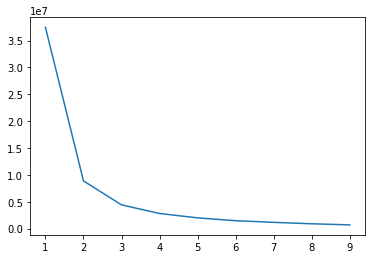

In [141]:
def elbow(X):
    costs = []

    for k in range(1,10):
        km_model = KMeans(n_clusters=k)
        km_model.fit(X)
        costs.append(km_model.inertia_)

    plt.plot(np.arange(1,10), costs)

elbow(X)

In [142]:
km_model = KMeans(n_clusters=4)
km_model.fit(X)
centers = km_model.cluster_centers_
km_model.labels_

array([0, 3, 3, ..., 0, 3, 0])

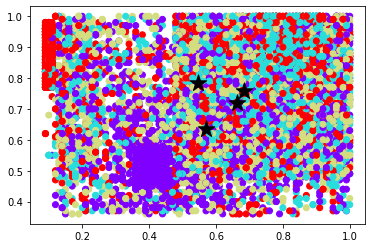

In [143]:
plt.scatter(X.iloc[:,0].values,X.iloc[:,1].values,c = km_model.labels_, cmap='rainbow')
plt.scatter(centers[:,0],centers[:,1],marker='*',c='black',s=300)

In [144]:
X = pd.DataFrame(columns =['memnuniyet_duzeyi','aldigi_degerlendirme_puani'],data=ik)

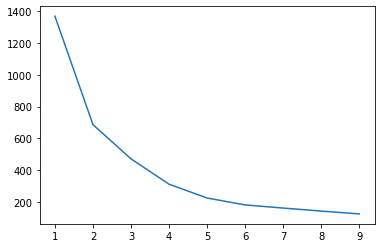

In [145]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
elbow(X)

In [146]:
km_model = KMeans(n_clusters=5)
km_model.fit(X)

KMeans(n_clusters=5)

In [147]:
centers = km_model.cluster_centers_

In [148]:
km_model.labels_

array([0, 1, 3, ..., 0, 3, 0])

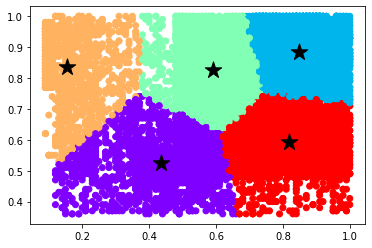

In [149]:
plt.scatter(X.iloc[:,0].values,X.iloc[:,1].values,c = km_model.labels_, cmap='rainbow')
plt.scatter(centers[:,0],centers[:,1],marker='*',c='black',s=300)

### Hierarchical

In [150]:
from sklearn.cluster import AgglomerativeClustering
Xy = pd.DataFrame(columns =['memnuniyet_duzeyi','aldigi_degerlendirme_puani'],data=ik)
agg_model = AgglomerativeClustering(n_clusters=5, linkage='average',affinity = 'cosine')
agg_model.fit(Xy)

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=5)

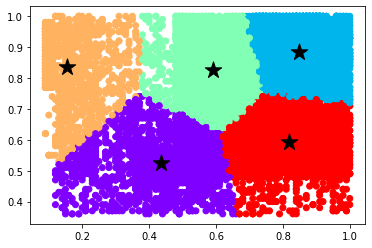

In [151]:
plt.scatter(Xy.iloc[:,0].values,Xy.iloc[:,1].values,c = km_model.labels_, cmap='rainbow')
plt.scatter(centers[:,0],centers[:,1],marker='*',c='black',s=300)

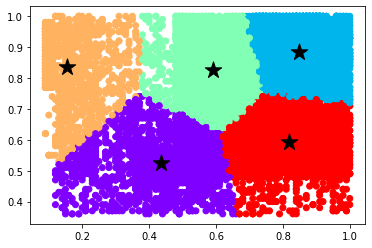

In [152]:
agg_model = AgglomerativeClustering(n_clusters=4, linkage='single')
agg_model.fit(X)
plt.scatter(X.iloc[:,0].values,X.iloc[:,1].values,c = km_model.labels_, cmap='rainbow')
plt.scatter(centers[:,0],centers[:,1],marker='*',c='black',s=300)

In [153]:
List2_1 = ['memnuniyet_duzeyi','aldigi_degerlendirme_puani']
List2_2 = [['0.72','0.88'],['0.45','0.33'],['0.25','0.54']]
tests3 = pd.DataFrame(columns=List2_1,data=List2_2)
km_model.predict(tests3)

array([1, 0, 0])